<a href="https://colab.research.google.com/github/sumguyneedz/ACM-ICPC-Preparation/blob/master/dl_12_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Define the Tensorflow definations

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name='weithts')
B = tf.Variable(np.random.randn(), name= 'bias')


In [0]:
learning_parameter = 0.01
epochs = 300

creating the dataset of linear regression


In [0]:
# Here the lin is y=Ax

sample_points = 50

x_train = np.linspace(0,20, sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

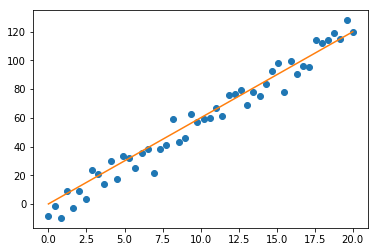

In [34]:
# Noisy dataset
plt.plot(x_train, y_train, 'o')
# Noise free dataset
plt.plot(x_train, 6*x_train)
plt.show()

In [0]:
# Create the model for regression

with tf.name_scope("Model") as scope:
  prediction = W*X + B
  

In [0]:
# Add summary to study behaviour of weights and biases with epochs

weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias", B)

In [0]:
# Cost function 

with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y) ** 2) / (2 * sample_points)

In [0]:
# Record the scalar summary of the cost function

cost_summary = tf.summary.scalar("Cost", cost_iteration)

In [0]:
# Define the optimizer
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

In [0]:
# Initialize the variables
init = tf.global_variables_initializer()

In [0]:
# Merge all the summaries into a single operator
merged_summary = tf.summary.merge_all()

In [0]:
# Define the tensorflow session
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X:x, Y:y})

In [44]:
# Write logs for each epochs
summary_epochs = sess.run(merged_summary, feed_dict = {X:x, Y:y})
writer.add_summary(summary_epochs, epoch)

if not epoch%40:
  W1 = sess.run(W)
  B1 = sess.run(B)
  cost_iter = sess.run(cost_iteration, feed_dict = {X:x, Y:y})
  print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter,W1))
  
 
Weight = sess.run(W)
Bias = sess.run(B)

plt.plot(x_train, y_train,'o')
plt.plot(x_train, Weight*x_train+Bias)
plt.show()

RuntimeError: ignored